# ProPublica Campaign API Data
ProPublica makes their campaign data API available to the public. This notebook will play around with some requests on the data.  

We'll use the utlity [jq](https://stedolan.github.io/jq/manual/) to filter the JSON returned from the API.  

Later, we'll use `pandas` and other tools to visualize the data.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2016 Presedential Race

In [6]:
DATA="data/campaign_totals_2016.json"

We'll just look at some results:

In [7]:
!cat $DATA | jq '.results[0:7]'

[
  {
    "slug": "clinton",
    "candidate_name": "Clinton, Hillary",
    "name": "Hillary Clinton",
    "party": "D",
    "committee": "committees/C00575795.json",
    "committee_id": "C00575795",
    "total_receipts": 186735031.61,
    "total_disbursements": 157763659.51,
    "cash_on_hand": 28971372.1,
    "date_coverage_to": "2016-03-31",
    "date_coverage_from": "2015-04-01",
    "candidate_id": "P00003392",
    "contributions_less_than_200": 51431956.48,
    "contributions_200_499": 11434374.12,
    "contributions_500_1499": 25107086.49,
    "contributions_1500_2699": 13644451.08,
    "contributions_max": 76523400,
    "net_primary": 24342711.9,
    "net_primary_pct": 13,
    "contributions_less_than_200_pct": 30.3,
    "contributions_max_pct": 45.1,
    "burn_rate": 106.9341168047289,
    "total_contributions": 169552497.08,
    "independent_expenditures_support": 10116597.97,
    "independent_expenditures_oppose": 6987601.95000001
  },
  {
    "slug": "sanders",
    "candidat

Conveniently, the first two results are Clinton and Sanders. Let's isolate the two using a range:

In [8]:
!cat $DATA | jq '.results[0:2]'

[
  {
    "slug": "clinton",
    "candidate_name": "Clinton, Hillary",
    "name": "Hillary Clinton",
    "party": "D",
    "committee": "committees/C00575795.json",
    "committee_id": "C00575795",
    "total_receipts": 186735031.61,
    "total_disbursements": 157763659.51,
    "cash_on_hand": 28971372.1,
    "date_coverage_to": "2016-03-31",
    "date_coverage_from": "2015-04-01",
    "candidate_id": "P00003392",
    "contributions_less_than_200": 51431956.48,
    "contributions_200_499": 11434374.12,
    "contributions_500_1499": 25107086.49,
    "contributions_1500_2699": 13644451.08,
    "contributions_max": 76523400,
    "net_primary": 24342711.9,
    "net_primary_pct": 13,
    "contributions_less_than_200_pct": 30.3,
    "contributions_max_pct": 45.1,
    "burn_rate": 106.9341168047289,
    "total_contributions": 169552497.08,
    "independent_expenditures_support": 10116597.97,
    "independent_expenditures_oppose": 6987601.95000001
  },
  {
    "slug": "sanders",
    "candidat

## 2020 Campaign Data 
It seems the presedential campaign data isn't there yet (which makes sense since as of now, it is early in the primary season). There is however some data for congressional races.  

First we'll query the API for PAC (Political Action Committees) money. There's a special endpoint to query for that, which is `https://api.propublica.org/campaign-finance/v1/2020/candidates/leaders/pac-total.json`. Saving that as JSON, we can look at the data.

In [9]:
DATA="data/pac_totals_2020.json"

Let's look at the first 5 results

In [10]:
!cat $DATA | jq '.results[0:5]'

[
  {
    "relative_uri": "/candidates/S4CO00395.json",
    "name": "GARDNER, CORY",
    "party": "REP",
    "state": "/races/CO.json",
    "district": "00",
    "committee": "/committees/C00492454.json",
    "status": "I",
    "total_from_individuals": 1995170.01,
    "total_from_pacs": 1320380.83,
    "total_contributions": 3360150.84,
    "candidate_loans": null,
    "total_disbursements": 793711.46,
    "begin_cash": 1701437.57,
    "end_cash": 4919791.17,
    "total_refunds": 46550,
    "debts_owed": null,
    "date_coverage_from": "2019-01-01",
    "date_coverage_to": "2019-06-30"
  },
  {
    "relative_uri": "/candidates/S2KY00012.json",
    "name": "MCCONNELL, MITCH",
    "party": "REP",
    "state": "/races/KY.json",
    "district": "00",
    "committee": "/committees/C00193342.json",
    "status": "I",
    "total_from_individuals": 2994920.43,
    "total_from_pacs": 1254488.28,
    "total_contributions": 4249408.71,
    "candidate_loans": null,
    "total_disbursements": 9196

Perhaps we should put this data into a dataFrame now that we see the general shape of the data. I've converted the raw JSON file into a csv, which will make our lives easier for `pandas`. 

In [3]:
df = pd.read_csv('data/pac_totals_2020.csv')

In [4]:
df

,results__relative_uri,results__name,results__party,results__state,results__district,results__committee,results__status,results__total_from_individuals,results__total_from_pacs,results__total_contributions,results__candidate_loans,results__total_disbursements,results__begin_cash,results__end_cash,results__total_refunds,results__debts_owed,results__date_coverage_from,results__date_coverage_to
0,/candidates/S4CO00395.json,"GARDNER, CORY",REP,/races/CO.json,0,/committees/C00492454.json,I,1995170.01,1320380.83,3360150.84,NaN,793711.46,1701437.57,4919791.17,46550.00,NaN,2019-01-01,2019-06-30
1,/candidates/S2KY00012.json,"MCCONNELL, MITCH",REP,/races/KY.json,0,/committees/C00193342.json,I,2994920.43,1254488.28,4249408.71,NaN,919654.68,3595456.04,7874816.47,57736.11,NaN,2019-01-01,2019-06-30
2,/candidates/S4MI00355.json,"PETERS, GARY",DEM,/races/MI.json,0,/committees/C00437889.json,I,2896352.95,1077617.44,3973970.39,NaN,1111493.99,1503727.91,4714855.59,16060.48,NaN,2019-01-01,2019-06-30
3,/candidates/S4NC00162.json,"TILLIS, THOM R. SEN.",REP,/races/NC.json,0,/committees/C00545772.json,I,1436143.46,1051300.00,2487443.46,NaN,710301.32,2025444.43,4387420.80,40880.00,NaN,2019-01-01,2019-06-30
4,/candidates/H2MD05155.json,"HOYER, STENY",DEM,/races/MD.json,5,/committees/C00140715.json,I,255967.14,885490.00,1141457.14,NaN,1051065.38,634132.38,865414.11,970.00,NaN,2019-01-01,2019-06-30
5,/candidates/S4IA00129.json,"ERNST, JONI K",REP,/races/IA.json,0,/committees/C00546788.json,I,1001901.01,864463.53,1866364.54,NaN,740748.29,1363149.69,3438302.17,20403.00,NaN,2019-01-01,2019-06-30
6,/candidates/S8AZ00221.json,"MCSALLY, MARTHA",REP,/races/AZ.json,0,/committees/C00666040.json,I,4049121.69,830650.00,4924371.69,NaN,2046560.38,923793.51,4376711.44,99679.75,NaN,2019-01-01,2019-06-30
7,/candidates/S0AL00156.json,"JONES, DOUG",DEM,/races/AL.json,0,/committees/C00640623.json,C,2599782.14,817712.94,3417495.08,NaN,1527526.54,2131165.71,4259540.86,39286.75,NaN,2019-01-01,2019-06-30
8,/candidates/S2MT00096.json,"DAINES, STEVEN",REP,/races/MT.json,0,/committees/C00491357.json,I,1417549.82,794692.49,2212242.31,NaN,581045.41,1450176.34,3510319.36,16672.75,NaN,2019-01-01,2019-06-30
9,/candidates/S2TX00106.json,"CORNYN, JOHN SEN",REP,/races/TX.json,0,/committees/C00369033.json,I,2153832.99,761650.00,2915482.99,NaN,1264464.62,5790126.35,9070560.43,7800.00,NaN,2019-01-01,2019-06-30


We definitely can see the data we need. So let's move to data visualization!  

First, we can make a plot to see how many candidates fit into certain brackets of PAC money. It will be a very basic histogram. 

Text(0, 0.5, 'No. of Candidates')

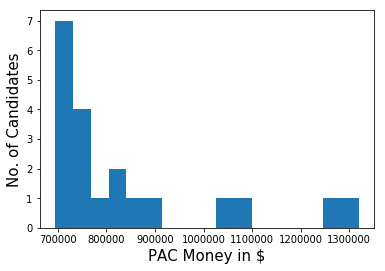

In [27]:
df['results__total_from_pacs'].hist(bins=17, grid=False, xlabelsize=10, ylabelsize=10)
plt.xlabel("PAC Money in $", fontsize=15)
plt.ylabel("No. of Candidates",fontsize=15)